In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# =========================
# League Points Prediction Pipeline
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# --- 1. Load Data ---
epl = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")
print("Data loaded successfully. Shape:", df.shape)
print(df.head(), "\n")

NameError: name 'df' is not defined

In [2]:
import pandas as pd

# --- 1. Load Data ---
epl = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx)

print("Data loaded successfully. Shape:", epl.shape)
print(epl.head(), "\n")


Data loaded successfully. Shape: (646, 10)
   Champion  played  won  drawn  lost  gf  ga  gd  points  notes
0         1     1.0   42     24    12   6  67  31      36     84
1         2     0.0   42     21    11  10  57  40      17     74
2         3     0.0   42     21     9  12  61  65      -4     72
3         4     0.0   42     20    11  11  68  46      22     71
4         5     0.0   42     17    12  13  63  55       8     63 



In [11]:
import pandas as pd

# Load data
epl = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")
print("Data loaded successfully. Shape:", epl.shape)
display(epl.head())

# Drop columns
epl = epl.drop(columns=["won", "drawn", "lost"])

# Show updated dataframe
print("\nUpdated DataFrame:")
display(epl.head())


Data loaded successfully. Shape: (646, 10)


,Champion,played,won,drawn,lost,gf,ga,gd,points,notes
0,1,1.0,42,24,12,6,67,31,36,84
1,2,0.0,42,21,11,10,57,40,17,74
2,3,0.0,42,21,9,12,61,65,-4,72
3,4,0.0,42,20,11,11,68,46,22,71
4,5,0.0,42,17,12,13,63,55,8,63



Updated DataFrame:


,Champion,played,gf,ga,gd,points,notes
0,1,1.0,6,67,31,36,84
1,2,0.0,10,57,40,17,74
2,3,0.0,12,61,65,-4,72
3,4,0.0,11,68,46,22,71
4,5,0.0,13,63,55,8,63


In [12]:
print(epl.columns.tolist())


['Champion', 'played', 'gf', 'ga', 'gd', 'points', 'notes']


In [15]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# -----------------------------
# 1. Load data
# -----------------------------
data = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")
data.columns = data.columns.str.strip()   # remove spaces in col names

# -----------------------------
# 2. Define Target and Features
# -----------------------------
# Example: predicting "points"
target = "points"

X = data.drop(columns=[target])
y = data[target]

# Convert categorical to numeric (if any)
X = pd.get_dummies(X, drop_first=True)

print("Final Feature Columns:")
print(X.columns)

# -----------------------------
# 3. CORRELATION-BASED SELECTION
# -----------------------------
corr = data.corr(numeric_only=True)

print("\nTop correlated features with target:")
print(corr[target].sort_values(ascending=False).head())

# ---------------------


Final Feature Columns:
Index(['Champion', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd',
       'notes'],
      dtype='object')

Top correlated features with target:
points    1.000000
notes     0.958271
drawn     0.940584
ga        0.901469
played    0.461516
Name: points, dtype: float64


In [16]:
from scipy.stats import zscore

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
z_scores = zscore(data[numeric_cols], nan_policy='omit')

outliers = (abs(z_scores) > 3).any(axis=1)

print("Number of outliers:", outliers.sum())
print("Outlier rows:")
print(data[outliers])


Number of outliers: 13
Outlier rows:
     Champion  played  won  drawn  lost  gf   ga   gd  points  notes
0           1     1.0   42     24    12   6   67   31      36     84
22          1     1.0   42     27    11   4   80   38      42     92
43         22     0.0   42      5    15  22   47  100     -53     30
65         22     NaN   42      7     6  29   36   93     -57     27
346         1     NaN   38     27     5   6  103   32      71     86
426         1     NaN   38     27     5   6  102   37      65     86
427         2     NaN   38     26     6   6  101   50      51     84
506         1     NaN   38     32     4   2  106   27      79    100
526         1     NaN   38     32     2   4   95   23      72     98
546         1     NaN   38     32     3   3   85   33      52     99
547         2     NaN   38     26     3   9  102   35      67     81
586         1     NaN   38     29     6   3   99   26      73     93
645        20     NaN   38      3     7  28   35  104     -69     

/tmp/ipykernel_48/3468108091.py:6: RuntimeWarning: invalid value encountered in greater
  outliers = (abs(z_scores) > 3).any(axis=1)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

# -----------------------------
# LOAD DATA
# -----------------------------
data = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")
data.columns = data.columns.str.strip()

# Remove useless columns
if "notes" in data.columns:
    data = data.drop(columns=["notes"])

# Encode Champion (if non-numeric)
if data["Champion"].dtype == "object":
    le = LabelEncoder()
    data["Champion"] = le.fit_transform(data["Champion"])

# -----------------------------
# FEATURES + TARGET
# -----------------------------
X = data.drop("points", axis=1)
y = data["points"]

# Make sure all X columns are numeric
X = X.apply(pd.to_numeric, errors="coerce")

# Remove rows with missing values (if any)
X = X.fillna(0)

# -----------------------------
# Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# MODELS
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror',
                            random_state=42)
}

results = []

# -----------------------------
# TRAIN & EVALUATE
# -----------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# -----------------------------
# RESULTS TABLE
# -----------------------------
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
print(results_df)


               Model           MAE          RMSE  R² Score
0  Linear Regression  4.967181e-15  6.165934e-15  1.000000
1      Random Forest  2.000154e+00  3.116877e+00  0.983225
2            XGBoost  1.899658e+00  2.877578e+00  0.985702


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


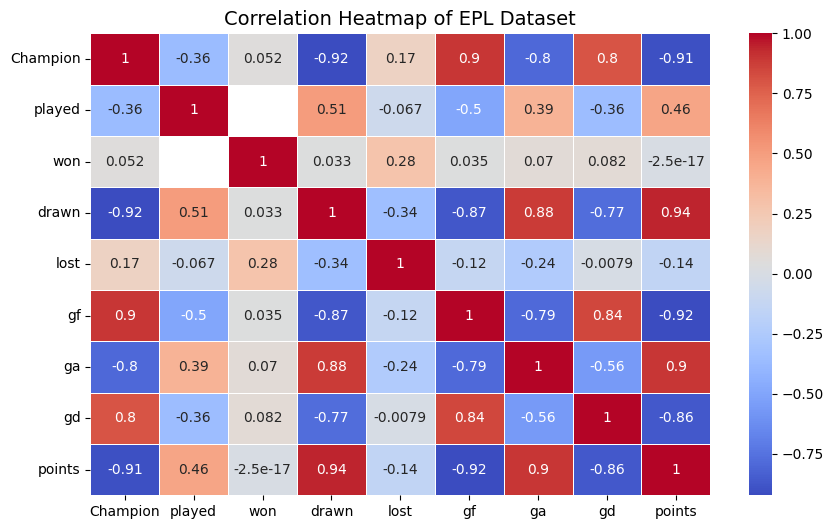

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Load your data
# -----------------------------
data = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")

# Clean column names
data.columns = data.columns.str.strip()

# Drop non-numeric column "notes" (heatmap works only with numeric values)
if "notes" in data.columns:
    data = data.drop(columns=["notes"])

# Convert any remaining non-numeric columns to numeric if possible
data = data.apply(pd.to_numeric, errors="coerce")

# -----------------------------
# HEATMAP
# -----------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of EPL Dataset", fontsize=14)
plt.show()


Z-score outliers:
     Champion  played  won  drawn  lost  gf   ga   gd  points
0           1  1.0000   42     24    12   6   67   31      36
22          1  1.0000   42     27    11   4   80   38      42
43         22  0.0000   42      5    15  22   47  100     -53
65         22     NaN   42      7     6  29   36   93     -57
346         1     NaN   38     27     5   6  103   32      71
426         1     NaN   38     27     5   6  102   37      65
427         2     NaN   38     26     6   6  101   50      51
506         1     NaN   38     32     4   2  106   27      79
526         1     NaN   38     32     2   4   95   23      72
546         1     NaN   38     32     3   3   85   33      52
547         2     NaN   38     26     3   9  102   35      67
586         1     NaN   38     29     6   3   99   26      73
645        20     NaN   38      3     7  28   35  104     -69

IQR outliers:
     Champion  played  won  drawn  lost  gf  ga   gd  points
0           1  1.0000   42     24    1

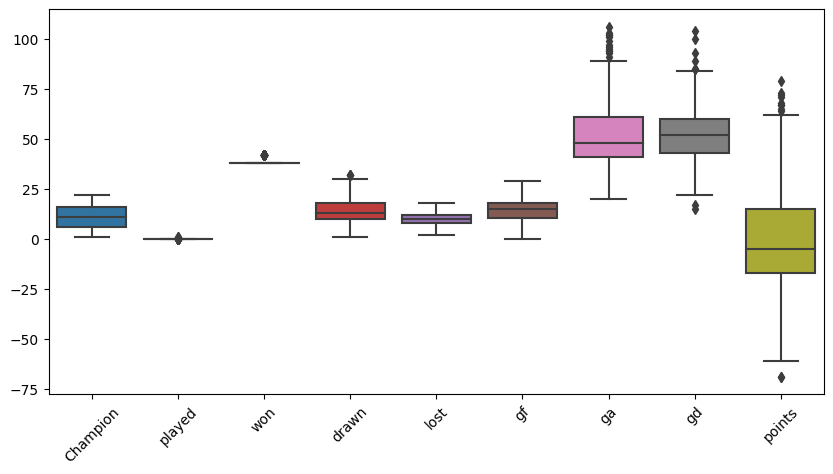

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Remove pandas printing warnings
# -----------------------------
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# -----------------------------
# Select numeric columns
# -----------------------------
numeric_cols = data.select_dtypes(include=["number"]).columns

# -----------------------------
# Fill NaN and avoid std=0 warnings
# -----------------------------
data_clean = data[numeric_cols].fillna(data[numeric_cols].mean())
z_scores = np.abs((data_clean - data_clean.mean()) / (data_clean.std() + 1e-9))

# -----------------------------
# Z-score Outliers
# -----------------------------
z_outliers = (z_scores > 3).any(axis=1)
print("Z-score outliers:")
print(data[z_outliers])

# -----------------------------
# IQR Outliers
# -----------------------------
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = (
    (data_clean < (Q1 - 1.5 * IQR)) |
    (data_clean > (Q3 + 1.5 * IQR))
).any(axis=1)

print("\nIQR outliers:")
print(data[iqr_outliers])

# -----------------------------
# Boxplot
# -----------------------------
plt.figure(figsize=(10,5))
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.show()
